## Week 3-2: Lasso and variants of lasso 


#### Last time
* Lasso
* LARs

#### Today
* Continue with LARS
* Coordinate descent
* Elastic Net
* Adaptive lasso
* Group lasso
* SCAN, etc...

#### References

- ESL, Chapter 3
- James Sharpnack's lecture notes
- Fan, J., and Li, R. (2001), Variable Selection via Nonconcave Penalized Likelihood and Its Oracle Properties. _JASA_ 96: 1348--1360
- Friedman, J., T. Hastie, H. Höfling, and R. Tibshirani. (2007) Pathwise Coordinate Optimation. _AOS_ 1:302--332
- Yuan, M. and Y. Lin (2006). Model selection and estimation in regression with grouped variables. _JRSSB_ 68:49--67
- Ročková, V. and E. I. George. (2018) Spike-and-slab LASSO. _JASA_ 113:431--444
- Zou, H. and T. Hastie. (2005), Regularization and variable selection via the elastic net. _JRSSB_ 67:301--320
- Zou, H. (2006). Adaptive Lasso and Its Oracle Properties. _JASA_ 101:1418--1429

#### Erranta

1. About one standard error rule

Given $$
\hat \lambda = \min_{\lambda \in \{\lambda_1, \dots, \lambda_m\}} \text{CVErr}(\hat \beta_{\text{lasso}}(\lambda)) 
$$
Choose $\hat \lambda_{\text{lasso}}$ such that 
    $$
    \hat \lambda_{\text{lasso}} = \max\{\lambda \in \{\lambda_1, \dots, \lambda_m\}, \quad 
        \text{CVErr}(\hat \beta_{\text{lasso}}(\lambda)) \leq 
        \text{CVErr}(\hat \beta_{\text{lasso}}(\hat \lambda)) + \text{SE}(\text{CVErr}(\hat \beta_{\text{lasso}}(\lambda)))\}
    $$
    
Should be 
Choose $\hat \lambda_{\text{lasso}}$ such that 
    $$
    \hat \lambda_{\text{lasso}} = \max\{\lambda \in \{\lambda_1, \dots, \lambda_m\}, \quad 
        \text{CVErr}(\hat \beta_{\text{lasso}}(\lambda)) \leq 
        \text{CVErr}(\hat \beta_{\text{lasso}}(\hat \lambda)) + \text{SE}(\text{CVErr}(\hat \beta_{\text{lasso}}\color{red}{(\hat\lambda)}))\}
    $$
    
See Ryan Tibshirani's note: [here](https://www.stat.cmu.edu/~ryantibs/advmethods/notes/highdim.pdf)


2. Orthgonal design $X'X = I_p$
$$
\hat \beta_j = \min_{\beta_j} \left\{
\frac{1}{2} \left(\beta_j - \hat \beta_j^{OLS}\right)^2 + \lambda |\beta_j|
\right\}
$$

- If $\hat \beta_j^{OLS} > 0$, then it is reasonable to set $\beta_j > 0$. Thus taking derivative w.r.t. $\beta_j$ and then setting it equals to zero, we obtain $\hat \beta_j = \hat \beta_j^{OLS} - \lambda$. Thus we get 
$\hat \beta_j = \max \left\{0, \hat \beta_j^{OLS} - \lambda \right\}$.
- If $\beta_j^{OLS} < 0$, then following a similar argument, we get $\hat \beta_j = \min \left\{\hat \beta_j^{OLS} + \lambda, 0 \right\}$.
- Combine the above two result, we get $\hat \beta_j = sgn\left(\hat \beta_j^{OLS}\right)\left(|\hat \beta_j^{OLS}| - \lambda\right)_+$.


### Lasso 

<img src="lasso.png" style="width: 600px;"/>

Lasso, short for 'least absolute selection operator', which shrinks some coefficients and sets others to 0, hence tries to retain the good features of both subset selection and ridge regression.

$$\min_{\beta \in \mathbb{R}^p} \left\{ \|Y - X\beta\|_2^2 + \lambda \|\beta\|_1 \right\},$$

where $\|\beta\| = \sum_{j=1}^p |\beta_j|$

### Least Angle Regression (LAR/LARS)

1. Standardize predictors and start with residual $r = y - \bar y$, $\hat \beta = 0$
2. Find $x_j$ most correlated with $r$
3. Move $\beta_j$ in the direction of $x_j^\top r$ until the residual is more correlated with another $x_k$
4. Move $\beta_j,\beta_k$ in the direction of their joint OLS coefficients of $r$ on $(x_j,x_k)$ until some other competitor $x_l$ has as much correlation with the current residual
5. Continue until all predictors have been entered.

### Understanding LAR

Recall that we've learned forward stepwise regression. To add one variable at a time. At each step, identify the best variable to include in the model, and then update the least square fit sequentially.

LAR uses a similar idead but instead of exploiting the current variable at much as possible, LARS only fits the current variable to a certain level.

At first step, similar to the forward stepwise regression, identify the variable most correlated with the response.

Then, increase the coefficient for this variable: 

   - What happens here is that the correlation between this variable and the residual of the fit to decrease (as the coefficient slowly increases)
   - stop until another variable has the same absolute correlation (with the residual) as the current one. At this point, both variables are in the active set.

At each step when a new variable enters the active set, $\mathcal{S}$, slowly increase the coefficient of the variables in $\mathcal{S}$ along the direction of the least-square of the current residual on $\mathcal{S}$, i.e.
$$
\beta_\mathcal{S}(\alpha) = \beta_\mathcal{S}(0) + \alpha \delta_{\mathcal{S}},
$$
where $\delta_{\mathcal{S}} = (X_\mathcal{S}'X_\mathcal{S})^{-1} X_\mathcal{S}'r$, $r = y - X_\mathcal{S}\beta_\mathcal{S}(0)$.
$\beta_\mathcal{S}(0)$ is the coefficent vector for the variables in $\mathcal{S}$ at the step. There are $|S| - 1$ zero values.

   - Note that the variable which just entered the active set had coefficient 0.
   - The correlations between the variables in $\mathcal{S}$ and the residual $r(\alpha) = y − X_\mathcal{S} \beta_{\mathcal{S}}(\alpha)$ decrease at the same time as $\alpha$ increases
    
Increase $\alpha$, until there is another variable which has as much correlation with the residual $r(\alpha)$ as the ones in the active set $\mathcal{S}$, at which point, the new variable enters the active set and the iterations restart.    

   - At each iteration, there is a value for $\beta$. This corresponds to a value of $t = \|\beta\|_1$
   - At the very beginning, when there was no variable in the active set. One could consider $t = 0$, i.e., $\|\beta\|_1 = 0$ or $\lambda = \infty$
   - In the end, when all variables are in the active set. This corresponds to $t = \|\hat \beta^{OLS}\|_1$, i.e., $\lambda = 0$.
   
   
Further reading: https://b-thi.github.io/pdfs/LARS.pdf

<img src="projection.png" style="width: 500px;"/>

### LARS with lasso modification

4.5 If a non-zero coefficient drops to 0 then remove it from the active set and recompute the restricted OLS.

![](lars_lasso.png)
from ESL

In [16]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, model_selection, linear_model

%matplotlib inline

In [17]:
## Simulate a dataset for lasso
np.random.seed(2022)
n=100
p=1000
X = np.random.randn(n,p)
X = preprocessing.scale(X)

In [18]:
## Subselect true active set
sprob = 0.02
Sbool = np.random.rand(p) < sprob
s = np.sum(Sbool)
print("Number of non-zero's: {}".format(s))

Number of non-zero's: 17


In [19]:
## Construct beta and y

mu = 100.
beta = np.zeros(p)
beta[Sbool] = mu * np.random.randn(s)

eps = np.random.randn(n)
y = X.dot(beta) + eps

Run the lasso using `linear_model.lars_path` with the lasso modification (see docstring with ?linear_model.lars_path) 

Plot the lasso coefficients that are learned as a function of lambda.  You should have a plot with the x-axis being lambda and the y-axis being the coefficient value, with $p=1000$ lines plotted.  Highlight the $s$ coefficients that are truly non-zero by plotting them in red.

In [20]:
?linear_model.lars_path

In [21]:
## Answer to exercise 5.3
## Run lars with lasso mod, find active set

larper = linear_model.lars_path(X,y,method="lasso")
S = set(np.where(Sbool)[0])

def plot_it():
    for j in S:
        _ = plt.plot(larper[0],larper[2][j,:],'r')
    for j in set(range(p)) - S:
        _ = plt.plot(larper[0],larper[2][j,:],'k',linewidth=.75)
    _ = plt.title('Lasso path for simulated data')
    _ = plt.xlabel('lambda')
    _ = plt.ylabel('Coef')

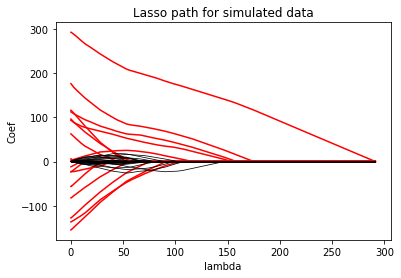

In [22]:
plot_it()

### Solving lasso using coordinate descent

Another popular method to solve lasso is coordinate descent. See more details [here](https://www.stat.cmu.edu/~ryantibs/convexopt-S15/lectures/22-coord-desc.pdf).

#### Coordinate descent (cd)

In general, for a function $f(\beta) = g(\beta) + \sum_{j=1}^p h_j(\beta_j)$ with $g$ is convex and differentiable and each $h_j$ is convex (nonsmooth), the cd method goes like this

- __Step 1:__ start with some initial guess $\beta^{(0)}$ (e.g., OLS estimator or Ridge estimator). 
- __Step 2:__ Repeat $k = 1, \dots, K$
    - $\beta_1^{(k)} = arg\min_{\beta_1} f(\beta_1, \beta_2^{(k-1)}, \beta_3^{(k-1)}, \dots, \beta_p^{(k-1)})$
    - $\beta_2^{(k)} = arg\min_{\beta_2} f(\beta_1^{(k)}, \beta_2, \beta_3^{(k-1)}, \dots, \beta_p^{(k-1)})$
    - $\beta_3^{(k)} = arg\min_{\beta_3} f(\beta_1^{(k)}, \beta_2^{(k)}, \beta_3, \dots, \beta_p^{(k-1)})$
    - $\cdots$
    - $\beta_p^{(k)} = arg\min_{\beta_p} f(\beta_1^{(k)}, \beta_2, \beta_3^{(k)}, \dots, \beta_{p-1}^{(k)}, \beta_p)$
- __STOP:__ if $\|\beta^{(k)} - \beta^{(k-1)}\|\leq \epsilon$ for some small $\epsilon$.    


Notes:

1. Order of cycle through coordinates is arbitrary, can use any permutation of $\{1, \dots, p\}$
2. Can everywhere replace individual coordinates with blocks of coordinates
3. “One-at-a-time” update scheme is critical, and “all-at-once” scheme _does not_ necessarily converge

#### Coordinate descent for lasso

Recall lasso 
$$
\min_{\beta} \frac{1}{2}\|y - X\beta\|^2 + \lambda \|\beta\|_1,
$$
Q: what is $g(\beta)$ and what is $h_j(\beta_j)$ here?

Apply CD, minimize $\beta_j$ one-at-a-time; keep other $\beta_{j'}$ fixed:
$$
\min_{\beta_j} \frac{1}{2}\|y - X_j\beta_j - X_{-j} \beta_{-j} \|^2 + \lambda (|\beta_j| + \|\beta_{-j}\|_1),
$$
Taking the first derivative w.r.t. $\beta_j$, we get
$$
X_j'X_j \beta_j + X_j'(X_{-j} \beta_{-j} - y) + \lambda s_j = 0,
$$
where $s_j = d|\beta_j| / d \beta_j$.

Denote $z_j = X_j'X_j$ and $\rho_j = X_j'(X_{-j} \beta_{-j} - y)$. Solving $\beta_j$, we get
\begin{align}
\hat\beta_j = \left\{
\begin{array}{cl}
\frac{\rho_j + \lambda}{z_j} & \text{if} \rho_j < - \lambda \\
0 & \text{if} -\lambda \leq \rho_j \leq \lambda \\
\frac{\rho_j - \lambda}{z_j} & \text{if} \rho_j > \lambda 
\end{array}
\right.
\end{align}

In short, one can denote 
$$
\hat \beta_j = \text{sgn}(\rho_j) \left(|\rho_j| - \lambda\right)_+,
$$
where $(a)_+ = \max\{0, a\}$

#### Coordinate descent in numpy 

See [website](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

In [ ]:
## Hitters dataset

df = pd.read_csv('../data/Hitters.csv', index_col=0).dropna()
df.index.name = 'Player'
df.info()

In [ ]:
df.head()

In [ ]:
y = df.Salary

# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
# Define the feature set X.
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X.info()

In [ ]:
X.head(5)

Use cross-validate to select the lambda just like any other tuning parameter.  

- Sklearn gives you the option of using their fast cross-validation script via `linear_model.LassoCV`, see the documentation.  You can create a leave-one-out cross validator with `model_selection.LeaveOneOut` then pass this to `LassoCV` with the `cv` argument.  Do this, and see what the returned fit and selected lambda are.

In [ ]:
## Fit the lasso and cross-validate, increased max_iter to achieve convergence
loo = model_selection.LeaveOneOut()
looiter = loo.split(X)
hitlasso = linear_model.LassoCV(cv=looiter,max_iter=2000) 
hitlasso.fit(X,y)

In [ ]:
print("The selected lambda value is {:.2f}".format(hitlasso.alpha_))

In [ ]:
hitlasso.coef_

We can also compare this to the selected model from forward stagewise regression:

```
[-0.21830515,  0.38154135,  0.        ,  0.        ,  0.        ,
        0.16139123,  0.        ,  0.        ,  0.        ,  0.        ,
        0.09994524,  0.56696569, -0.16872682,  0.16924078,  0.        ,
        0.        ,  0.        , -0.19429699,  0.        ]
```

This is not exactly the same model with differences in the inclusion or exclusion of AtBat, HmRun, Runs, RBI, Years, CHmRun, Errors, League_N, Division_W, NewLeague_N

In [ ]:
bforw = [-0.21830515,  0.38154135,  0.        ,  0.        ,  0.        ,
        0.16139123,  0.        ,  0.        ,  0.        ,  0.        ,
        0.09994524,  0.56696569, -0.16872682,  0.16924078,  0.        ,
        0.        ,  0.        , -0.19429699,  0.        ]

In [ ]:
print(", ".join(X.columns[(hitlasso.coef_ != 0.) != (bforw != 0.)]))

### Is the lasso method good?

From Ročková and George (2018)

_Simulation study:_

- $n = 100$, $p = 1000$
- Generate $y \sim N(X\beta_0, I_n)$
    - $X \sim N(0, \Sigma)$, $\Sigma = \text{bdiag}(\tilde \Sigma, \tilde \Sigma, \dots, \tilde \Sigma)$; 
      diagonal of $\tilde \Sigma$ is 1 and off-diagonal is $0.9$
    - 6 coordinates in $\beta_0$ are non-zero, the remaining is 0. Nonzero coordinates are at $1, 51, 101, 151, 201, 251$ locations. Values are chosen $\frac{1}{\sqrt{3}}\{−2.5, −2, −1.5, 1.5, 2, 2.5\}$
- Generate 100 independent copies of $y$

<img src="comparison.png" style="width: 700px;"/>

- SSL (spike-and-slab lasso), EMVS & Horseshoe are Bayesian methods
- MSE: mean square error
- FDR: false discovery rate (true value is 0, but get non-zero estimated value)
- FNR: false negative rate (true value is non-zero, but get 0)
- $\hat q$: average size of the model
- TRUE: number of true model detected
- HAM: hamming loss (classification error)

### 1. Adaptive lasso


Why we are not satisfied with lasso?

Fan and Li (2001)
- Lasso can perform automatic variable selection because the $\ell_1$-penalty
- the lasso shrinkage produces biased estimates for the large coefficients, and thus it could be suboptimal in terms of estimation risk

Although lasso selection can be consistent under certain conditions, Zhou (2006) showed that when the condition is violated, lasso variable selection could be inconsistent.

A good reference book on this topic is _Martin J. Wainwright. High-dimensional Statistics: A non-asymptotic viewpoint. Cambridge_ (Free download [here](https://www.cambridge.org/core/books/highdimensional-statistics/8A91ECEEC38F46DAB53E9FF8757C7A4E))

Zou (2006) proposed the weighted lasso
$$
\hat \beta_{adalasso} = arg\min_\beta \frac{1}{2} \| y - X\beta\|_2^2 + \lambda \sum_{j=1}^p \hat w_j |\beta_j|,
$$
where $\hat w_j = 1/|\hat \beta_j|$. $\hat \beta_j$ can be 1) OLS estimator; 2) ridge estimator; ...

Idea: When $|\beta_j|$ is large, $\hat w_j$ is small (penalize less --> less bias); when $|\beta_j|$ is small, $\hat w_j$ is large (penalize more).

This [website](https://towardsdatascience.com/an-adaptive-lasso-63afca54b80d) provides a tutorial on implementing the adaptive lasso method in python.

### 2. SCAD (smoothly clipped absolute deviations)

_Fan and Li (2001)_

A good penalty function should result in an estimator with three properties:
1. Unbiasedness: The resulting estimator is nearly unbi- ased when the true unknown parameter is large to avoid unnecessary modeling bias. 
2. Sparsity: The resulting estimator is a thresholding rule, which automatically sets small estimated coefficients to zero to reduce model complexity. 
3. Continuity: The resulting estimator is continuous in data to avoid instability in model prediction.


<img src="scad.png" style="width: 900px;"/>

The penalty term for SCAD

\begin{align}
h(z| \lambda, \gamma) = \left\{
\begin{array}{cl}
\lambda |z| & \text{if} |z| \leq \lambda \\
\frac{2a \lambda|z| - z^2 - \lambda^2}{2(a-1)} & \text{if} \lambda < |z| <a\lambda \\
\frac{\lambda^2 (a+1)}{2} & \text{if} |z| \geq a\lambda
\end{array}
\right.
\end{align}
One chooses $a > 2$

Comparing to lasso, its penalty term is $\lambda |z|$. SCAD coincides with the lasso until $|z| = \lambda$, then
smoothly transitions to a quadratic function until $|z| = \gamma\lambda$, after which it remains constant for all $|z| > \gamma\lambda$


__Package__: I did not find a python package for SCAD, but there is a R package [ncvreg](https://cran.r-project.org/web/packages/ncvreg/ncvreg.pdf) for SCAD

### 3. Elastic Net

_Zou and Hastie (2005)_

- In the $p > n$ case, the lasso selects at most $n$ variables before it saturates
- If there is a group of variables among which the pairwise correlations are very high, then the lasso tends to select only one variable from the group and does not care which one is selected.
- The elastic net encourages a grouping effect, where strongly correlated predictors tend to be in or out of the model together

The elastic net solution
$$
{\displaystyle {\hat {\beta}_{en} } = {\underset {\beta }{\operatorname {argmin} }}(\|y-X\beta \|^{2}+\lambda _{2}\|\beta \|^{2}+\lambda _{1}\|\beta \|_{1}).}
$$

- Can be also solved using coordinate descent

__Package__: Elastic net is available in scikit-learn [here](https://scikit-learn.org/stable/modules/linear_model.html#elastic-net)

### 4. Group lasso

_Yuan and Lin (2006)_

If we know several variables come in the same (predefined) group. One wants to either force all of them to 0 or non-zero, then one can use the group lasso (say there are $J$ groups)
$$
\hat \beta_{glasso} = arg\min_\beta \left\{ \left\|y - \sum_{j=1}^J X_j\beta_j\right\|^2 + \lambda \sum_{j=1}^J \|\beta_j\| \right\},
$$
when $J = P$, it reduces to lasso. The norm $\sum_{j=1}^J \|\beta_j\|$ is known as the $\ell_{2,1}$-norm

__Package__: No default package. See implementatio [here](https://github.com/yngvem/group-lasso)

Other methods?

- MCP (minimax concave penalty): idea is similar to SCAD, but use a different penalty. 

      Cun-Hui Zhang (2010). Nearly Unbiased Variable Selection Under Minimax Concave Penalty. AOS. 38:894--942

- Fused lasso. A generalization of lasso for problems with features that can be ordered in some meaningful way.

      Robert Tibshirani et al (2005). Sparsity and smoothness via the fused lasso. JRSSB. 67:91--108

- The dantzig selector. Read Ch 3.8.3 of ESL

- Spike-and-slab lasso. Derived from the Bayesian perspective. 
        
      Ročková, V. and E. I. George. (2018) Spike-and-slab LASSO. _JASA_ 113:431--444
        
- Full Bayesian procedure: sparse priors (to be covered later of this course).

      Note: Some textbook often says that lasso can be viewed as the Bayes estimate using the double exponential (or Laplace) prior (e.g., on Page 72 of ESL); similar to the ridge regression, using a multivariate normal prior. However, the LASSO (so does ridge) is not fully Bayesian. We will explain later when we discuss 
      Bayesian methods.